In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read CSV

df = pd.read_csv("Data sets/plastic-waste-by-sector/plastic-waste-by-sector.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               30 non-null     object 
 1   Code                                 30 non-null     object 
 2   Year                                 30 non-null     int64  
 3   Transportation                       30 non-null     int64  
 4   Road marking                         30 non-null     float64
 5   Packaging                            30 non-null     int64  
 6   Marine coatings                      30 non-null     float64
 7   Building and construction            30 non-null     int64  
 8   Electronics                          30 non-null     int64  
 9   Textile sector                       30 non-null     int64  
 10  Personal care products               30 non-null     float64
 11  Other                             

In [6]:
df.head()

,Entity,Code,Year,Transportation,Road marking,Packaging,Marine coatings,Building and construction,Electronics,Textile sector,Personal care products,Other,Industrial machinery,Consumer and institutional products
0,World,OWID_WRL,1990,16924000,195000.0,39820000,163000.0,21872000,5251000,11637000,7000.0000,19433000,817000.00,13770000
1,World,OWID_WRL,1991,17601000,203000.0,41350000,169000.0,22684000,5444000,12129000,7000.0000,20160000,846000.00,14277000
2,World,OWID_WRL,1992,18766000,215000.0,44021000,180000.0,24119000,5787000,12959000,8000.0005,21440000,898000.00,15177000
3,World,OWID_WRL,1993,19597000,224000.0,45901000,187000.0,25116000,6024000,13560000,8000.0005,22333000,934000.00,15801000
4,World,OWID_WRL,1994,21564000,246000.0,50433000,205000.0,27558000,6608000,14951000,9000.0000,24513000,1024000.06,17336000


In [7]:
df['Entity'].value_counts()

Entity
World    30
Name: count, dtype: int64

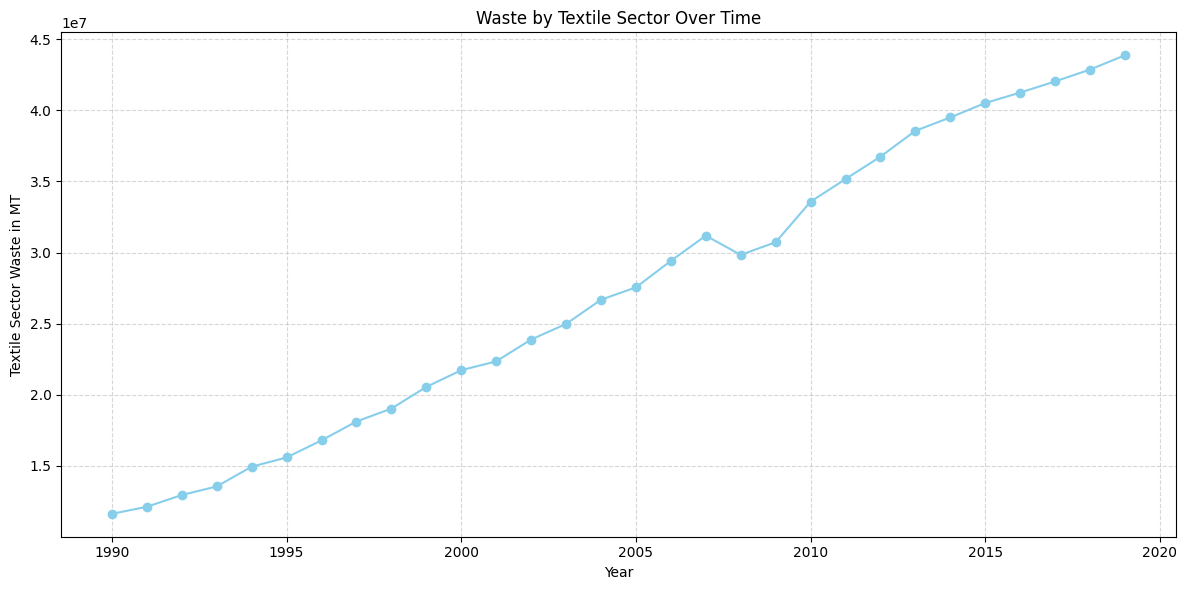

In [8]:
import matplotlib.pyplot as plt

# Step 1: Extract 'Year' and 'Textile sector' columns
textile_data = df[['Year', 'Textile sector']]

# Step 2: Plot the trend over time
plt.figure(figsize=(12, 6))
plt.plot(textile_data['Year'], textile_data['Textile sector'], marker='o', linestyle='-', color='skyblue')

# Step 3: Customize the plot
plt.title("Waste by Textile Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Textile Sector Waste in MT")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("textile_waste.svg")
# Display the plot
plt.show()


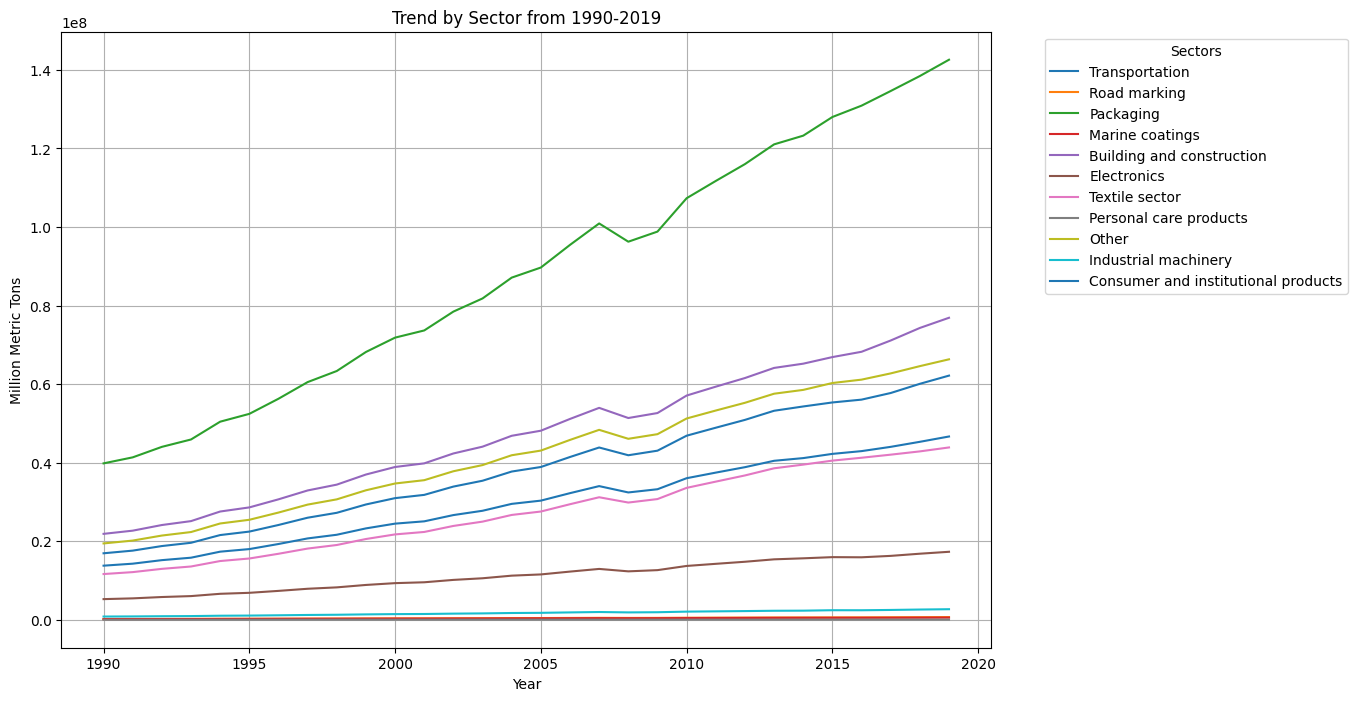

In [9]:
# Plotting each sector as a line
plt.figure(figsize=(12, 8))
for column in df.columns[3:]:  # All columns starting from 'Transportation'
    plt.plot(df['Year'], df[column], label=column)

plt.title("Trend by Sector from 1990-2019")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.savefig("Waste_sectors.svg")
plt.show()

In [10]:
## Getting percentage of Textile sector vs other sectors f

# Calculate the total sum of all sectors
total_sum = df.iloc[:, 3:].sum().sum()

# Calculate the sum of the 'Textile sector'
textile_sum = df['Textile sector'].sum()

# Calculate the percentage
textile_percentage = (textile_sum / total_sum) * 100

# Display the result
print(f"Percentage contribution of Textile sector: {textile_percentage:.2f}%")


Percentage contribution of Textile sector: 9.51%


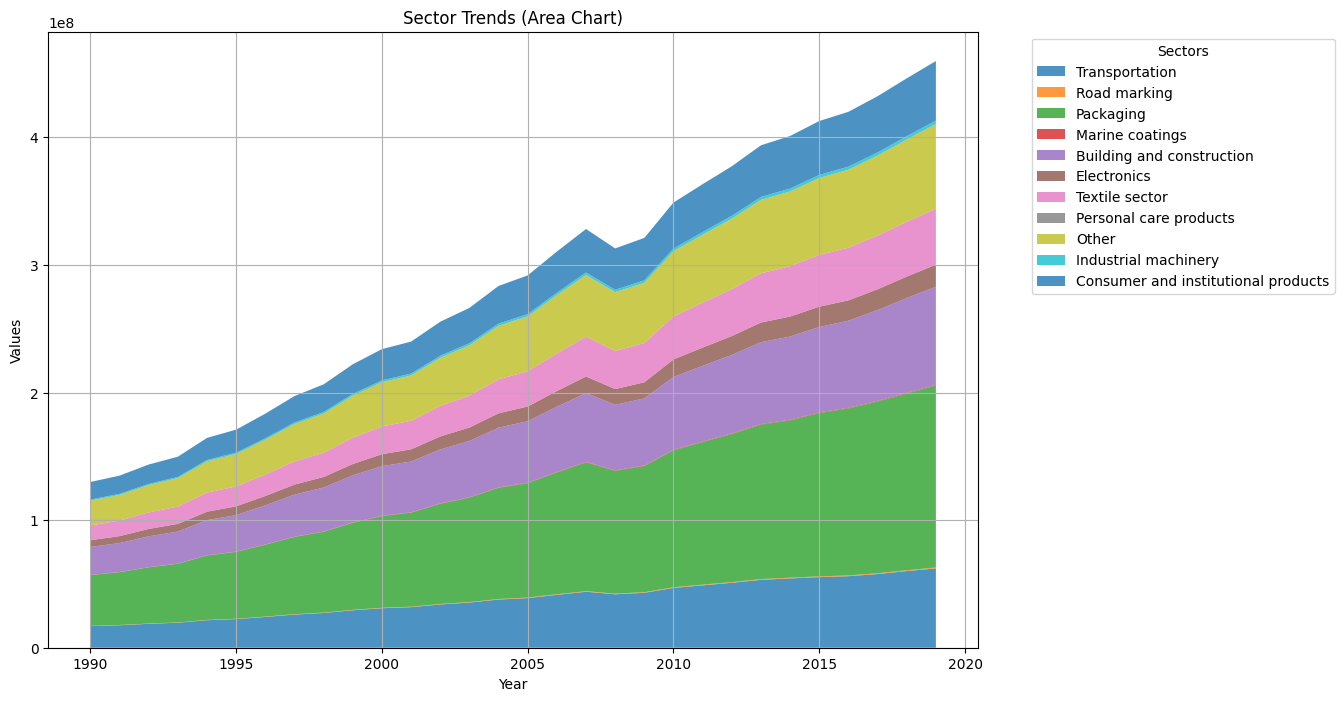

In [11]:
# Plot area chart
plt.figure(figsize=(12, 8))
plt.stackplot(df['Year'], [df[col] for col in df.columns[3:]], labels=df.columns[3:], alpha=0.8)

plt.title("Sector Trends (Area Chart)")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.savefig("Waste_sectors2.svg")
plt.show()

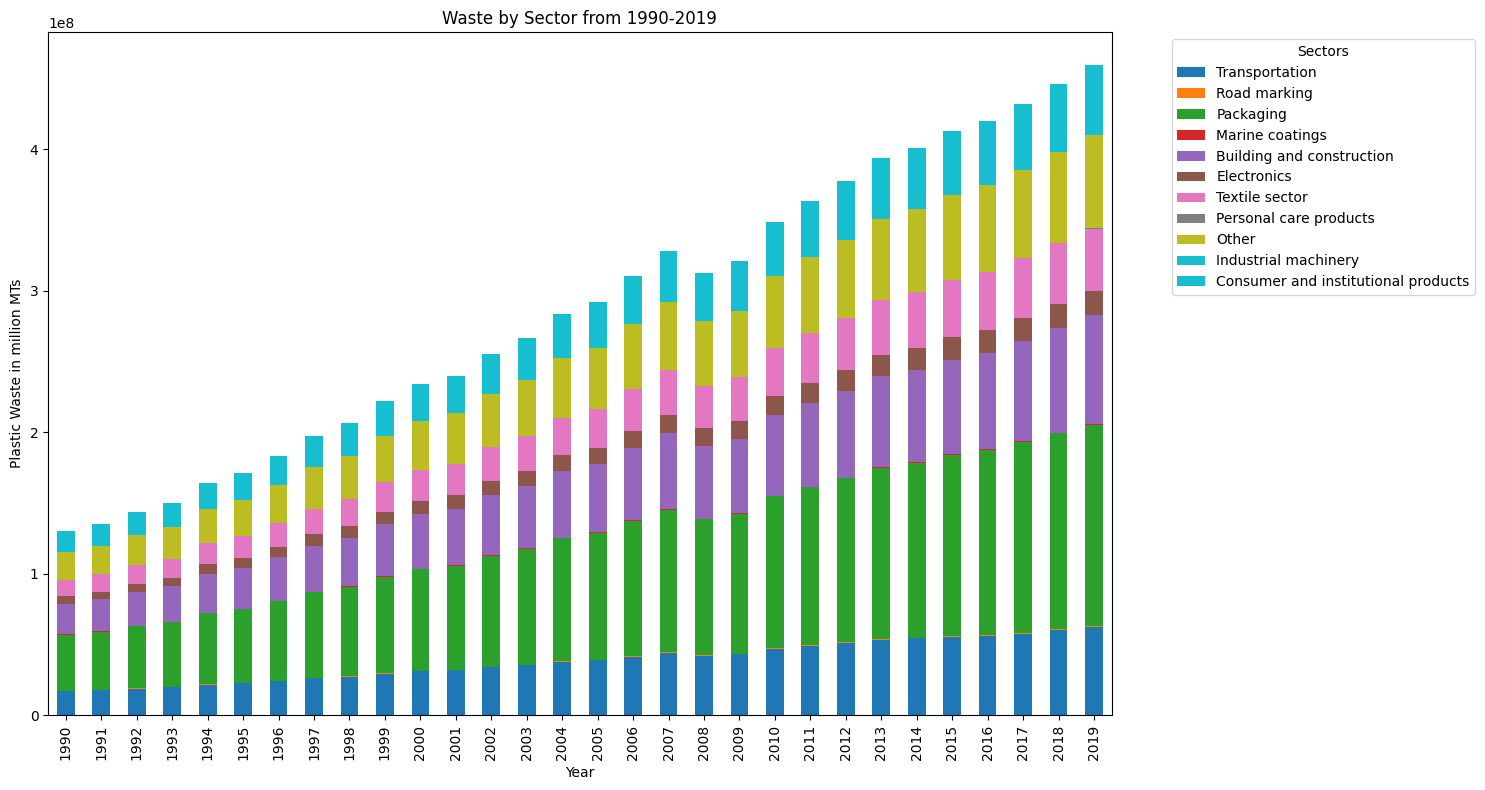

In [12]:

# Prepare data for plotting
sector_data = df.set_index('Year').iloc[:, 2:]  # Remove Entity and Code columns

# Plot stacked bar chart
sector_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab10')
plt.title("Waste by Sector from 1990-2019")
plt.xlabel("Year")
plt.ylabel("Plastic Waste in million MTs")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Waste_sectors_bar.svg")
plt.show()

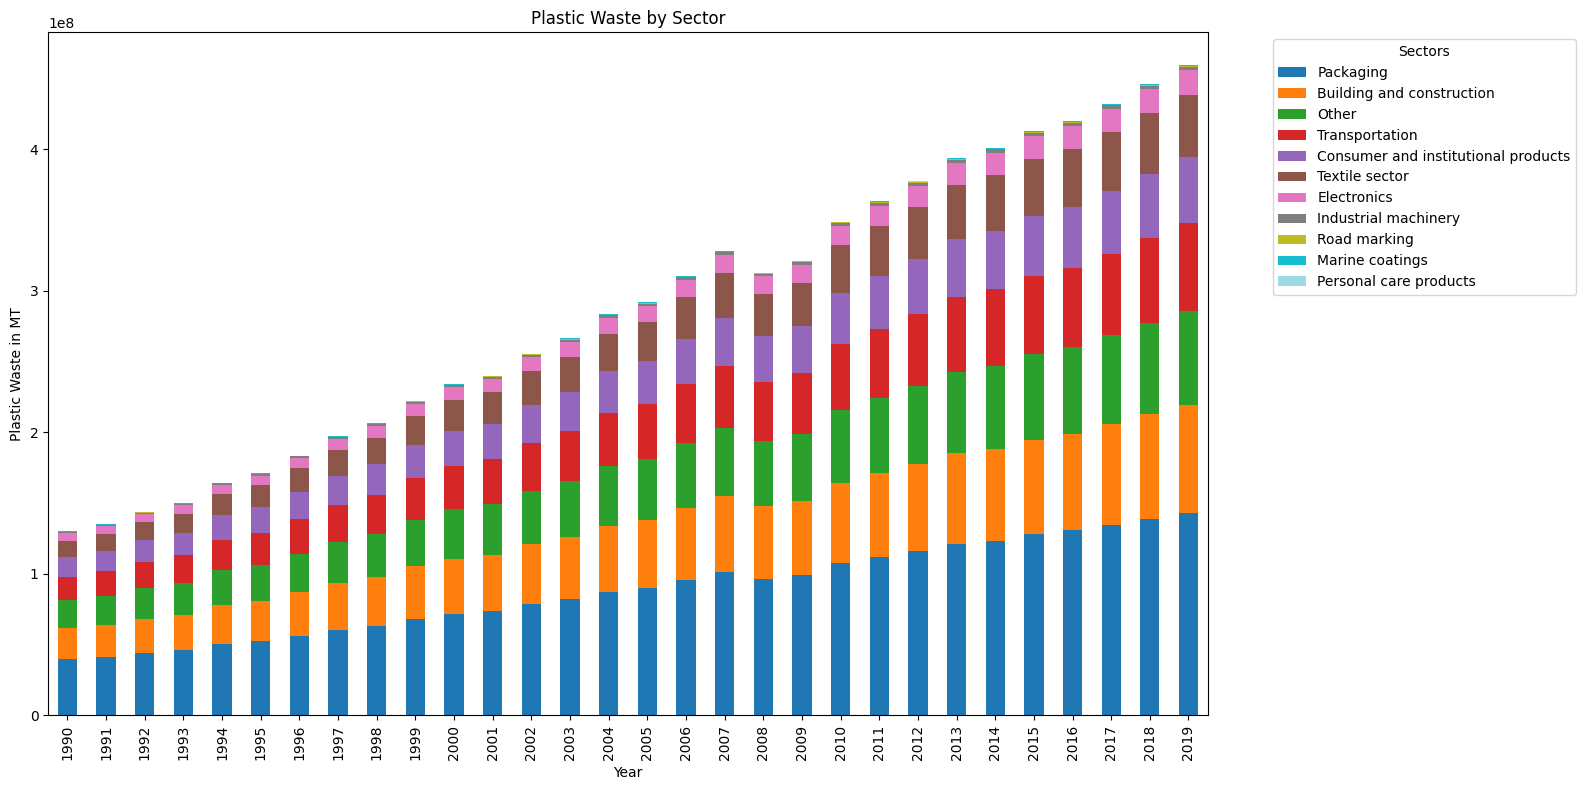

In [13]:
# Step 1: Prepare data for plotting
sector_data = df.set_index('Year').iloc[:, 2:]  # Remove 'Entity' and 'Code' columns

# Step 2: Order columns based on total sum (highest to lowest)
sector_data = sector_data[sector_data.sum().sort_values(ascending=False).index]

# Step 3: Plot stacked bar chart with ordered columns
sector_data.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

# Step 4: Customize the chart
plt.title("Plastic Waste by Sector")
plt.xlabel("Year")
plt.ylabel("Plastic Waste in MT")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
# Aggregate the sector values across all years
sector_totals = df.iloc[:, 3:].sum()

# Display the total sums
sector_totals

Transportation                         1.148060e+09
Road marking                           1.271800e+07
Packaging                              2.650273e+09
Marine coatings                        1.052100e+07
Building and construction              1.418838e+09
Electronics                            3.367770e+08
Textile sector                         8.178370e+08
Personal care products                 4.990000e+05
Other                                  1.264315e+09
Industrial machinery                   5.139100e+07
Consumer and institutional products    8.901030e+08
dtype: float64

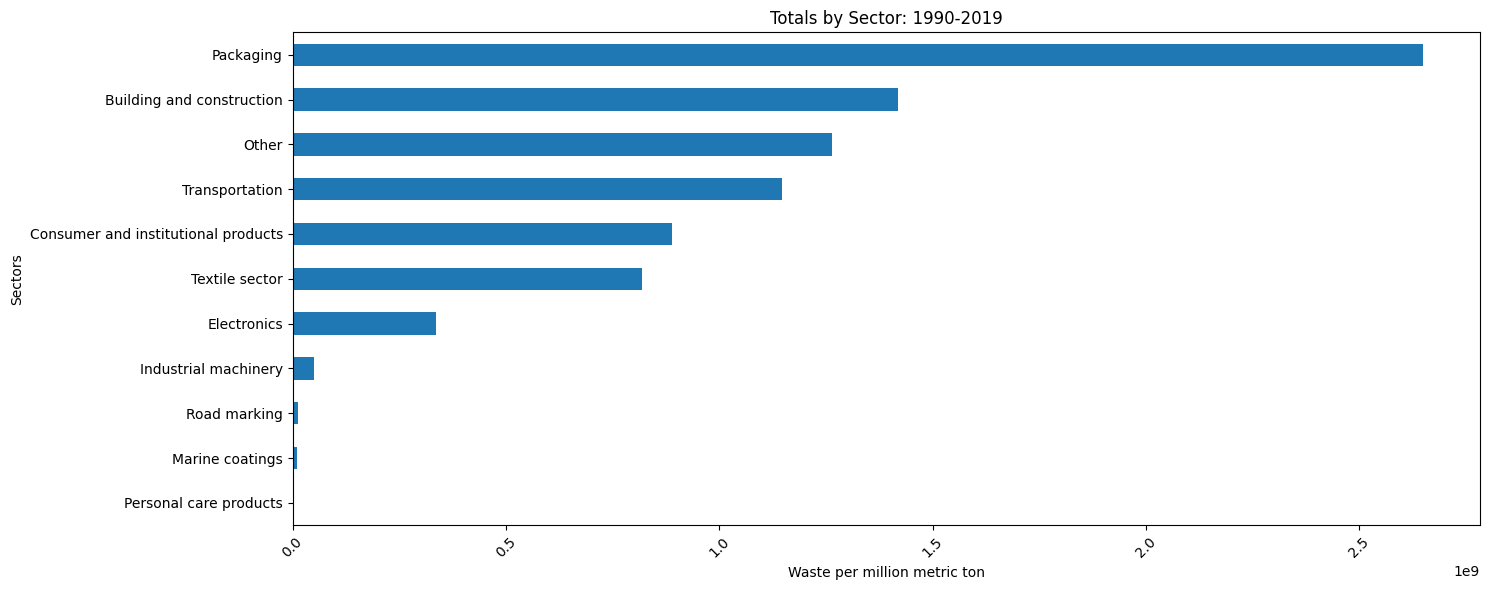

In [15]:
# Bar plot for sector totals
plt.figure(figsize=(15, 6))
sector_totals.sort_values(ascending=True).plot(kind='barh', colormap='tab20')

plt.title("Totals by Sector: 1990-2019")
plt.xlabel("Waste per million metric ton")
plt.ylabel("Sectors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sector_totals.svg")
plt.show()

In [16]:
## Get only 2019 data

# Filter data for the year 2019
data_2019 = df[df['Year'] == 2019]

# Drop unnecessary columns (Entity, Code, Year) to get only sector data
sector_data_2019 = data_2019.iloc[:, 3:]
sector_data_2019

# Display the result
#print("2019 Sector Data:")
#print(sector_data_2019)

,Transportation,Road marking,Packaging,Marine coatings,Building and construction,Electronics,Textile sector,Personal care products,Other,Industrial machinery,Consumer and institutional products
29,62165000,682000.0,142598990,541000.0,76893000,17305000,43875000,27000.0,66315004,2683000.0,46662000


In [17]:
# Transpose the data for easier plotting
sector_data_2019_t = sector_data_2019.T
sector_data_2019_t



,29
Transportation,62165000.0
Road marking,682000.0
Packaging,142598990.0
Marine coatings,541000.0
Building and construction,76893000.0
Electronics,17305000.0
Textile sector,43875000.0
Personal care products,27000.0
Other,66315004.0
Industrial machinery,2683000.0


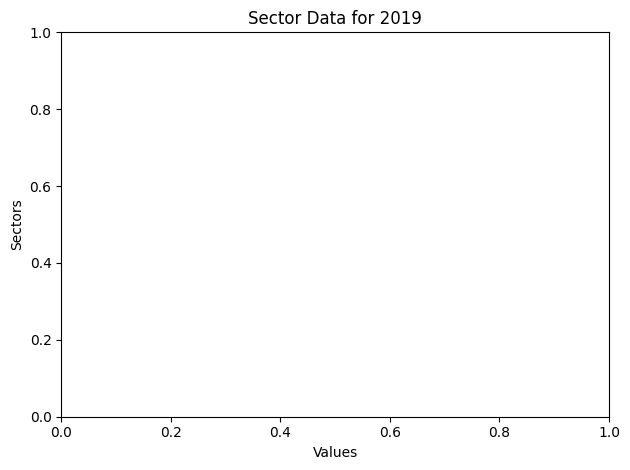

In [18]:
# Plot a horizontal bar chart
#plt.figure(figsize=(10, 6))
#sector_data_2019_t.sort_values(by='Value', ascending=True).plot(kind='barh', legend=False, color='skyblue')


# Customize the chart
plt.title("Sector Data for 2019")
plt.xlabel("Values")
plt.ylabel("Sectors")
plt.tight_layout()
plt.show()